###1. What is a Decision Tree, and how does it work?
A Decision Tree is a tree-structured model that splits data based on feature conditions to make predictions.

###2. What are impurity measures in Decision Trees?
They quantify how mixed the classes are in a node (e.g., Gini, Entropy).

###3. What is the mathematical formula for Gini Impurity?
Gini = 1 - Σ(Pi^2), where pᵢ is the class probability.

###4. What is the mathematical formula for Entropy?
Entropy = −Σ(pi logbase2 pi).

###5. What is Information Gain, and how is it used in Decision Trees?
Information Gain measures impurity reduction after a split and selects the best split.

###6. What is the difference between Gini Impurity and Entropy?
Gini is faster to compute; Entropy is more sensitive to class distribution changes.

###7. What is the mathematical explanation behind Decision Trees?
They recursively split data to minimize impurity using greedy optimization.

###8. What is Pre-Pruning in Decision Trees?
Stopping tree growth early using constraints like max depth or min samples.

###9. What is Post-Pruning in Decision Trees?
Growing a full tree first, then trimming nodes to reduce overfitting.

###10. What is the difference between Pre-Pruning and Post-Pruning?
Pre-pruning stops early; post-pruning simplifies after full growth.

###11. What is a Decision Tree Regressor?
It predicts continuous values by minimizing variance or MSE at splits.

###12. What are the advantages and disadvantages of Decision Trees?
Advantages: interpretable, non-linear; Disadvantages: overfitting, instability.

###13. How does a Decision Tree handle missing values?
By surrogate splits, imputation, or treating missing as a separate category.

###14. How does a Decision Tree handle categorical features?
By splitting categories into subsets or using one-hot encoding.

###15. What are some real-world applications of Decision Trees?
Credit scoring, medical diagnosis, fraud detection, and customer segmentation.

In [44]:
#16 - Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy.

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(accuracy_score(y_test, model.predict(X_test)))

0.9666666666666667


In [45]:
#17 - Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances.

model = DecisionTreeClassifier(criterion="gini")
model.fit(X_train, y_train)
print(model.feature_importances_)

[0.01251826 0.         0.54371341 0.44376833]


In [46]:
#18 - Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy.

model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
print(accuracy_score(y_test, model.predict(X_test)))

0.9666666666666667


In [47]:
#19 - Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE).

from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
print(mean_squared_error(y_test, reg.predict(X_test)))

0.5386784218839923


In [48]:
#20 - Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz.

from sklearn.tree import DecisionTreeRegressor, export_text

model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X_train, y_train)

print(export_text(model))

|--- feature_0 <= 5.08
|   |--- feature_0 <= 3.13
|   |   |--- feature_2 <= 4.34
|   |   |   |--- value: [1.63]
|   |   |--- feature_2 >  4.34
|   |   |   |--- value: [1.17]
|   |--- feature_0 >  3.13
|   |   |--- feature_5 <= 2.40
|   |   |   |--- value: [2.81]
|   |   |--- feature_5 >  2.40
|   |   |   |--- value: [1.88]
|--- feature_0 >  5.08
|   |--- feature_0 <= 6.82
|   |   |--- feature_5 <= 2.60
|   |   |   |--- value: [3.57]
|   |   |--- feature_5 >  2.60
|   |   |   |--- value: [2.66]
|   |--- feature_0 >  6.82
|   |   |--- feature_0 <= 7.82
|   |   |   |--- value: [3.77]
|   |   |--- feature_0 >  7.82
|   |   |   |--- value: [4.59]



In [49]:
#21 - Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree.

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

shallow = DecisionTreeRegressor(max_depth=3, random_state=42)
deep = DecisionTreeRegressor(random_state=42)

shallow.fit(X_train, y_train)
deep.fit(X_train, y_train)

print(mean_squared_error(y_test, shallow.predict(X_test)))
print(mean_squared_error(y_test, deep.predict(X_test)))

0.6307597519882218
0.5428222185932364


In [50]:
#22 - Write a Python program to train a Decision Tree Classifier using min _samples_split=5 and compare its accuracy with a default tree.

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree1 = DecisionTreeRegressor(min_samples_split=5, random_state=42)
tree2 = DecisionTreeRegressor(random_state=42)

tree1.fit(X_train, y_train)
tree2.fit(X_train, y_train)

print(mean_squared_error(y_test, tree1.predict(X_test)))
print(mean_squared_error(y_test, tree2.predict(X_test)))

0.5015045684027168
0.5428222185932364


In [51]:
#23 - Write a Python program to apply feature scaling before training a Decision Tree Regressor and compare performance.

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)
mse_unscaled = mean_squared_error(y_test, model.predict(X_test))

model.fit(X_train_s, y_train)
mse_scaled = mean_squared_error(y_test, model.predict(X_test_s))

print(mse_unscaled)
print(mse_scaled)

0.5428222185932364
0.5424849617443798


In [52]:
#24 - Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification.

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

ovr = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ovr.fit(X_train, y_train)

print(accuracy_score(y_test, ovr.predict(X_test)))

1.0


In [53]:
#25 - Write a Python program to train a Decision Tree Regressor and display feature importance scores.

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

print(model.feature_importances_)

[0.         0.00843971 0.95248255 0.03907774]


In [54]:
#26 - Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree.

reg1 = DecisionTreeRegressor(max_depth=5)
reg2 = DecisionTreeRegressor()

reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)

print(mean_squared_error(y_test, reg1.predict(X_test)))
print(mean_squared_error(y_test, reg2.predict(X_test)))

0.0
0.0


In [55]:
#27 - Write a Python program to train a Decision Tree Regressor, apply Cost Complexity Pruning (CCP), and evaluate performance.

path = DecisionTreeRegressor(random_state=42).cost_complexity_pruning_path(X_train, y_train)
alphas = path.ccp_alphas[:5]

from sklearn.metrics import mean_squared_error

for a in alphas:
    reg = DecisionTreeRegressor(ccp_alpha=a, random_state=42)
    reg.fit(X_train, y_train)
    print(mean_squared_error(y_test, reg.predict(X_test)))

0.0
0.00029931972789115435
0.00029931972789115435
0.00863265306122449
0.008827442445203061


In [56]:
#28 - Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))
print(f1_score(y_test, y_pred, average="macro"))

1.0
1.0
1.0


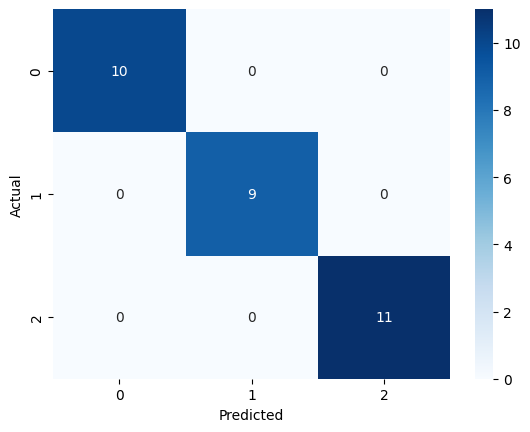

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [57]:
#29 - Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(cm)

In [58]:
#30 - Write a Python program to use GridSearchCV to find optimal Decision Tree Regressor parameters.

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

params = {
    "max_depth": [3, 5, None],
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    params,
    scoring="neg_mean_squared_error"
)

grid.fit(X_train, y_train)

print(grid.best_params_)
print(-grid.best_score_)

{'max_depth': 3, 'min_samples_split': 2}
0.05741628327801709
